In [1]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import datetime

import warnings
warnings.filterwarnings('ignore')

네이버 언론사별 랭킹 뉴스 - 많이 본 뉴스

In [3]:
# 1) 데이터 프레임 생성
data = pd.DataFrame(columns= ['언론사명', '순위', '기사제목', '기사링크', '수집일자'])

# 2) 네이버 언론사별 랭킹 뉴스 url
url = 'https://news.naver.com/main/ranking/popularDay.naver'

# 3) url에서 HTML 가져오기
html = urlopen(url)

# 4) HTML 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser', from_encoding='UTF-8')

# 5) 네이버 랭킹 정보가 있는 div class -> rankingnews_box 만 가져오기
div = soup.find_all('div', {'class' : 'rankingnews_box'})

# 6) 네이버 랭킹 기사 제목, 언론사 등 데이터 크롤링
for index_div in range(0, len(div)):
  #d 언론사 추출 
  strong = div[index_div].find('strong', {'class': 'rankingnews_name'})
  press = strong.text

  # 5개의 순위 기사 정보
  ul = div[index_div].find_all('ul', {'class' : 'rankingnews_list'})
  
  for index_r in range(0, len(ul)):
    li = ul[index_r].find_all('li')
    for index_l in range(0, len(li)):
      try:
        rank = li[index_l].find('em',{'class':'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        data = data.append({'언론사명' : press,
                            '순위' : rank,
                            '기사제목' : title,
                            '기사링크' : link,
                            '수집일자' : datetime.datetime.now()}, ignore_index = True)
      except:
          pass

      print('Complets of' + rank + ' : '+ title)

print('__________')
print(data)


Complets of1 : 4명에 생명 주고 떠난 남편…"자랑스러운 아빠로 기억되길"
Complets of2 : "빨리 좌회전 해" 손님 요구에…흉기 휘두른 대리기사 '체포'
Complets of3 : 또 엠폭스 2명 늘어 총 18명…"피부접촉·성접촉 주의해야"
Complets of4 : 윤 대통령 "민간인 대규모 공격시 우크라에 인도적 지원만 고집 어려워" 로이터 인터뷰
Complets of5 : 전남 화순 요양병원 불...화재 대응 2단계 발령
Complets of1 : “쿠팡 때문에 영화관 망하겠네” 4900원에 2만원짜리 영화 무제한 제공
Complets of2 : “제주도보다 싸다고, 일본 많이 가더니” 야놀자 엄청나게 벌었다
Complets of3 : “아기 낳았더니 남편 회사 회장님이 집 방문”…이 회사 어디?
Complets of4 : “300억원 벌고 ‘돈맛’ 알더니” 문 닫은지 3일 만에 ‘컴백’?
Complets of5 : ‘현실판 더글로리’ 표예림 동창, 가해자 넷 신상 공개…한 명은 직장 잘렸다
Complets of1 : "전 여친 이름까지 나와"…박수홍, '횡령 혐의' 친형 재판 '비공개' 신청
Complets of2 : 붕어빵 4000원·닭꼬치 5000원…백화점 2배 '명동 길거리 음식'
Complets of3 : [단독] 국회의원도 에코프로 '4배' 대박…민주당 김경협 가족 수익 '3억'
Complets of4 : "밤새워 환자 봐도 시급 1000원" 젊은 의사들이 '뇌졸중' 기피하는 이유
Complets of5 : "휴.. 너 다시 돌아왔니?".. 누누티비 활동 재개 선언
Complets of1 : [뉴스딱] "내 월급만 그대로인가"…월 400만 원 이상 근로자 '역대 최고'
Complets of2 : 전남 화순 요양병원 화재…'대응 2단계' 발령
Complets of3 : '현실판 더글로리' 표예림 씨 동창생이 가해자 신상 공개
Complets of4 : 새벽에 편의점 턴 절도범…이름 · 전화번호는 왜 남겼을까
Complets 

In [4]:
data.head()

,언론사명,순위,기사제목,기사링크,수집일자
0,JTBC,1,"4명에 생명 주고 떠난 남편…""자랑스러운 아빠로 기억되길""",https://n.news.naver.com/article/437/000033990...,2023-04-19 08:44:23.221259
1,JTBC,2,"""빨리 좌회전 해"" 손님 요구에…흉기 휘두른 대리기사 '체포'",https://n.news.naver.com/article/437/000033988...,2023-04-19 08:44:23.227104
2,JTBC,3,"또 엠폭스 2명 늘어 총 18명…""피부접촉·성접촉 주의해야""",https://n.news.naver.com/article/437/000033990...,2023-04-19 08:44:23.230915
3,JTBC,4,"윤 대통령 ""민간인 대규모 공격시 우크라에 인도적 지원만 고집 어려워"" 로이터 인터뷰",https://n.news.naver.com/article/437/000033988...,2023-04-19 08:44:23.234699
4,JTBC,5,전남 화순 요양병원 불...화재 대응 2단계 발령,https://n.news.naver.com/article/437/000033991...,2023-04-19 08:44:23.238560


In [5]:
data.to_csv('네이버랭킹뉴스_크롤링_많이 본 뉴스_20230419.csv', encoding = 'utf-8-sig', index = False)

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import konlpy
from wordcloud import WordCloud

In [7]:
# 워드 클라아ㅜ다ㅡ를 위한 기사제목 text로 변환
text = " ".join(li for li in data['기사제목'].astype(str))
text

'4명에 생명 주고 떠난 남편…"자랑스러운 아빠로 기억되길" "빨리 좌회전 해" 손님 요구에…흉기 휘두른 대리기사 \'체포\' 또 엠폭스 2명 늘어 총 18명…"피부접촉·성접촉 주의해야" 윤 대통령 "민간인 대규모 공격시 우크라에 인도적 지원만 고집 어려워" 로이터 인터뷰 전남 화순 요양병원 불...화재 대응 2단계 발령 “쿠팡 때문에 영화관 망하겠네” 4900원에 2만원짜리 영화 무제한 제공 “제주도보다 싸다고, 일본 많이 가더니” 야놀자 엄청나게 벌었다 “아기 낳았더니 남편 회사 회장님이 집 방문”…이 회사 어디? “300억원 벌고 ‘돈맛’ 알더니” 문 닫은지 3일 만에 ‘컴백’? ‘현실판 더글로리’ 표예림 동창, 가해자 넷 신상 공개…한 명은 직장 잘렸다 "전 여친 이름까지 나와"…박수홍, \'횡령 혐의\' 친형 재판 \'비공개\' 신청 붕어빵 4000원·닭꼬치 5000원…백화점 2배 \'명동 길거리 음식\' [단독] 국회의원도 에코프로 \'4배\' 대박…민주당 김경협 가족 수익 \'3억\' "밤새워 환자 봐도 시급 1000원" 젊은 의사들이 \'뇌졸중\' 기피하는 이유 "휴.. 너 다시 돌아왔니?".. 누누티비 활동 재개 선언 [뉴스딱] "내 월급만 그대로인가"…월 400만 원 이상 근로자 \'역대 최고\' 전남 화순 요양병원 화재…\'대응 2단계\' 발령 \'현실판 더글로리\' 표예림 씨 동창생이 가해자 신상 공개 새벽에 편의점 턴 절도범…이름 · 전화번호는 왜 남겼을까 동탄에서도 \'전세 사기 의심\' 신고…"오피스텔 250채 부부 파산" 前여친 이름 등장하자 "비열"…박수홍 \'친형 재판\' 비공개 요청, 왜 공원서 \'거꾸리\' 하다 사지마비…"구청 5억8000만원 지급하라" "지점 대신 ATM"이라던 은행...알고보니 ATM 더 많이 없앴다 27억이 137억 됐다..."낭비"라던 \'함평 황금박쥐상\'의 대반전 \'재떨이 수행\' 김여정처럼…김정은 뒤 성냥갑 든 딸 김주애 "청와대를 세계인의 여행 버킷리스트로"...10개 도보 관광코스 조성 베

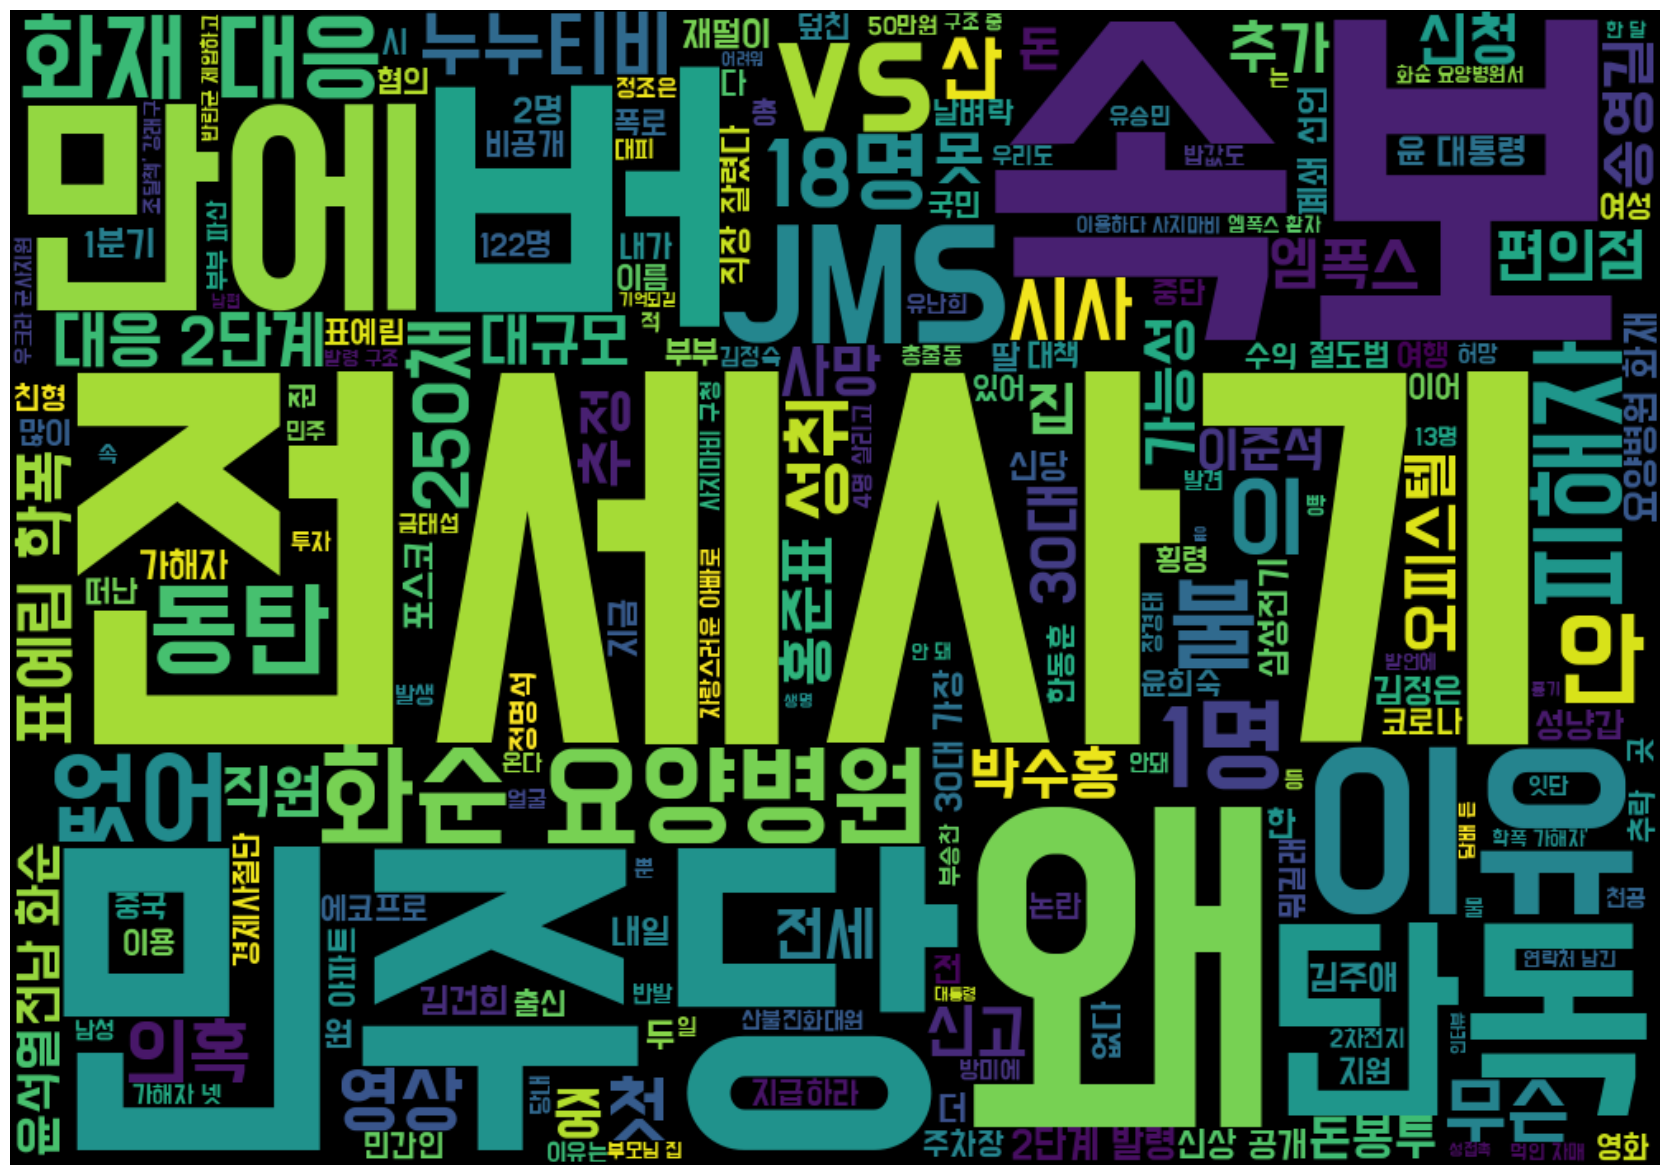

In [8]:
# 한글 폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize= (25,15))
wordcloud = WordCloud(width = 1000, height = 700, font_path =font_path).generate(text)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

내이버 언론사별 랭킹 뉴스 - 댓글이 많은 뉴스

In [19]:
# 1) 데이터 프레임 생성
data_d = pd.DataFrame(columns= ['언론사명', '순위', '기사제목', '기사링크', '수집일자'])

# 2) 네이버 언론사별 랭킹 뉴스 url
ur2 = 'https://news.naver.com/main/ranking/popularMemo.naver'

# 3) url에서 HTML 가져오기
html1 = urlopen(ur2)

# 4) HTML 파싱하여 변환
soup1 = BeautifulSoup(html1, 'html.parser', from_encoding='UTF-8')

# 5) 네이버 랭킹 정보가 있는 div class -> rankingnews_box 만 가져오기
div1 = soup1.find_all('div', {'class' : 'rankingnews_box'})

# 6) 네이버 랭킹 기사 제목, 언론사 등 데이터 크롤링
for index_div1 in range(0, len(div1)):
  #d 언론사 추출 
  strong = div1[index_div1].find('strong', {'class': 'rankingnews_name'})
  press = strong.text

  # 5개의 순위 기사 정보
  ul = div1[index_div1].find_all('ul', {'class' : 'rankingnews_list'})
  
  for index_r in range(0, len(ul)):
    li = ul[index_r].find_all('li')

    for index_l in range(0, len(li)):

      try:

        rank = li[index_l].find('em',{'class':'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        data_d = data_d.append({'언론사명' : press,
                            '순위' : rank,
                            '기사제목' : title,
                            '기사링크' : link,
                            '수집일자' : datetime.datetime.now()}, ignore_index = True)
      except:
          pass

      print('Complets of ' + rank + ' : '+ title)

print('__________')
print(data_d)


Complets of 1 : 이재명 “껍데기는 가라…아무리 강한 권력도 국민 못 이겨”
Complets of 2 : “미모女 옷 벗겨 특정부위 잘보이게 석고상 떴다”…JMS ‘엽기성착취’ 충격
Complets of 3 : [단독] 한동훈 장관 개인정보 유출자, 김건희 여사 자료도 갖고 있어
Complets of 4 : 김다예 “김용호, 박수홍 이용해 엄청난 슈퍼챗…3억 4천 수익 추정”
Complets of 5 : “화장 안했잖아”…JMS 2인자 ‘정조은’ 얼굴 방송서 빼달라는 신도들
Complets of 1 : 윤 대통령 "민간인 대규모 공격시 우크라에 인도적 지원만 고집 어려워" 로이터 인터뷰
Complets of 2 : "12년간 괴롭힌 일진 무리입니다"…학폭 가해자 신상공개 파문
Complets of 3 : 한국 숙소 물 120톤 쓴 중국인 왜? '예약취소 거부 보복 때문'
Complets of 4 : 편의점 물건 훔친 뒤 이름·연락처 남긴 절도범 붙잡혀…"배고파서 그랬다"
Complets of 5 : "콜라에 바퀴벌레가"...롯데리아 경기도 지점 영업정지 5일
Complets of 1 : 윤 대통령, 결국 중국 건드렸다…“대만 무력 현상변경, 절대 반대”
Complets of 2 : 이재명, 尹 ‘우크라 군사지원 가능성’에 “국익에 심각한 위해”
Complets of 3 : “몰카·꽃뱀·여경·조선족·잼민이 표현 사용 삼가주세요”
Complets of 4 : 웃으며 1명 살해하고…‘심신미약’ 주장한 30대
Complets of 5 : “일본의 아시아 소국 전락은 피할 수 없는 현실…이제 받아들여야” 日전문가의 탄식
Complets of 1 : 이용 "김정숙 전용기 혼자 타고 여행…김건희 여사 뭐가 나쁜가"
Complets of 2 : "얘네가 애들 가르친다고?"…사범대 쓰레기통 충격 사진 한 장
Complets of 3 : 홍준표, 윤희숙에 "고추 말리는 공항? 입 다물고 기웃대지 말라"
Complets of 4 : 前여친 이름 등장하자 "비열"…박수홍

In [20]:
data_d.to_csv('네이버랭킹뉴스_가장 댓글이 많은 뉴스_20230419.csv', encoding = 'utf-8-sig', index = False)

In [21]:
text1 = " ".join(li for li in data_d['기사제목'].astype(str))
text1

'이재명 “껍데기는 가라…아무리 강한 권력도 국민 못 이겨” “미모女 옷 벗겨 특정부위 잘보이게 석고상 떴다”…JMS ‘엽기성착취’ 충격 [단독] 한동훈 장관 개인정보 유출자, 김건희 여사 자료도 갖고 있어 김다예 “김용호, 박수홍 이용해 엄청난 슈퍼챗…3억 4천 수익 추정” “화장 안했잖아”…JMS 2인자 ‘정조은’ 얼굴 방송서 빼달라는 신도들 윤 대통령 "민간인 대규모 공격시 우크라에 인도적 지원만 고집 어려워" 로이터 인터뷰 "12년간 괴롭힌 일진 무리입니다"…학폭 가해자 신상공개 파문 한국 숙소 물 120톤 쓴 중국인 왜? \'예약취소 거부 보복 때문\' 편의점 물건 훔친 뒤 이름·연락처 남긴 절도범 붙잡혀…"배고파서 그랬다" "콜라에 바퀴벌레가"...롯데리아 경기도 지점 영업정지 5일 윤 대통령, 결국 중국 건드렸다…“대만 무력 현상변경, 절대 반대” 이재명, 尹 ‘우크라 군사지원 가능성’에 “국익에 심각한 위해” “몰카·꽃뱀·여경·조선족·잼민이 표현 사용 삼가주세요” 웃으며 1명 살해하고…‘심신미약’ 주장한 30대 “일본의 아시아 소국 전락은 피할 수 없는 현실…이제 받아들여야” 日전문가의 탄식 이용 "김정숙 전용기 혼자 타고 여행…김건희 여사 뭐가 나쁜가" "얘네가 애들 가르친다고?"…사범대 쓰레기통 충격 사진 한 장 홍준표, 윤희숙에 "고추 말리는 공항? 입 다물고 기웃대지 말라" 前여친 이름 등장하자 "비열"…박수홍 \'친형 재판\' 비공개 요청, 왜 [단독] \'돈봉투 의혹\'에…이낙연 "DJ때 아들 비리 엄정수사 촉구" 尹 “우크라 대량학살 발생시 인도적 지원만 고집 어려워” [잇슈 키워드] “구운 오징어 한 마리가 얼마요?”…명동 노점 ‘바가지’ 논란 “엄마, 2만 원만 보내줄 수 있어?”…전세 사기에 바스러진 청춘의 삶 연일 발생하는 엠폭스 확진자…감염경로 대부분 성접촉 미국의 일방주의, 한국 경제는 특히 더 걱정 붕어빵 4000원·닭꼬치 5000원…백화점 2배 \'명동 길거리 음식\' "밤새워 환자 봐도 시급 1000원" 젊은 의사들이

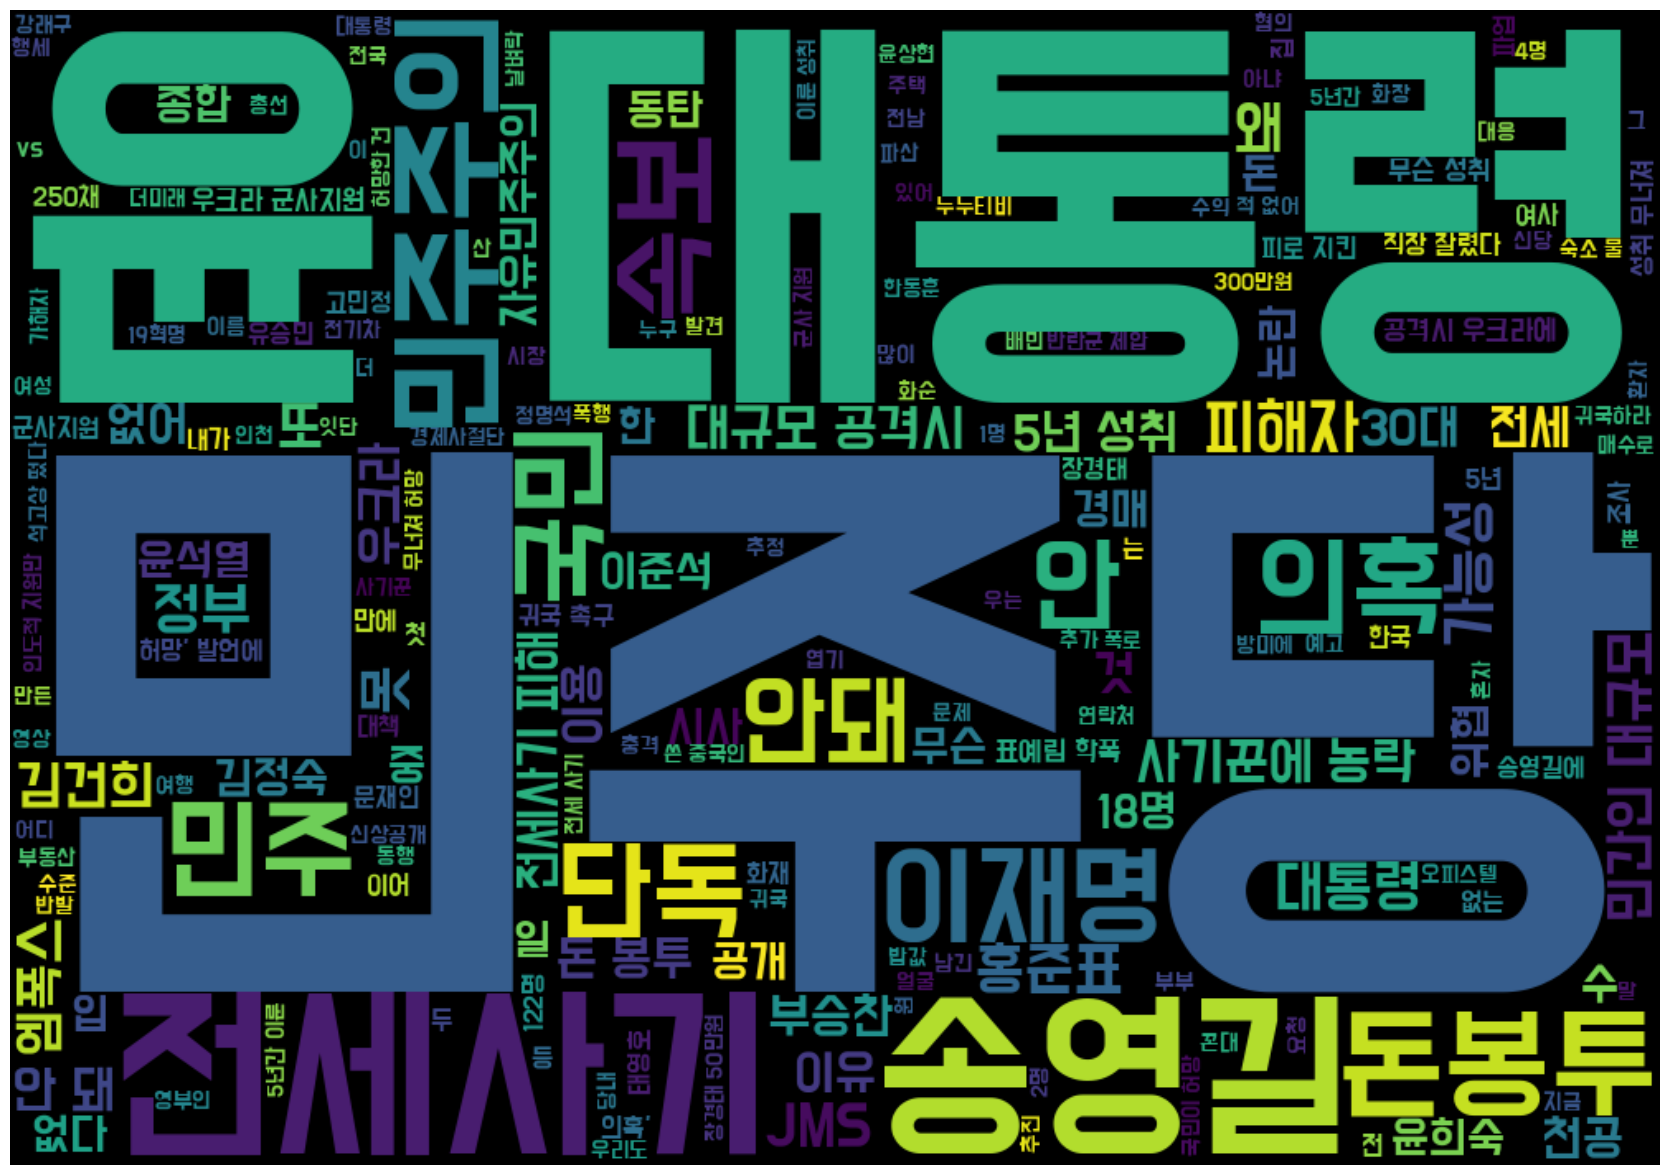

In [23]:
# 한글 폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize= (25,15))
wordcloud2 = WordCloud(width = 1000, height = 700, font_path =font_path).generate(text1)

plt.axis('off')
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

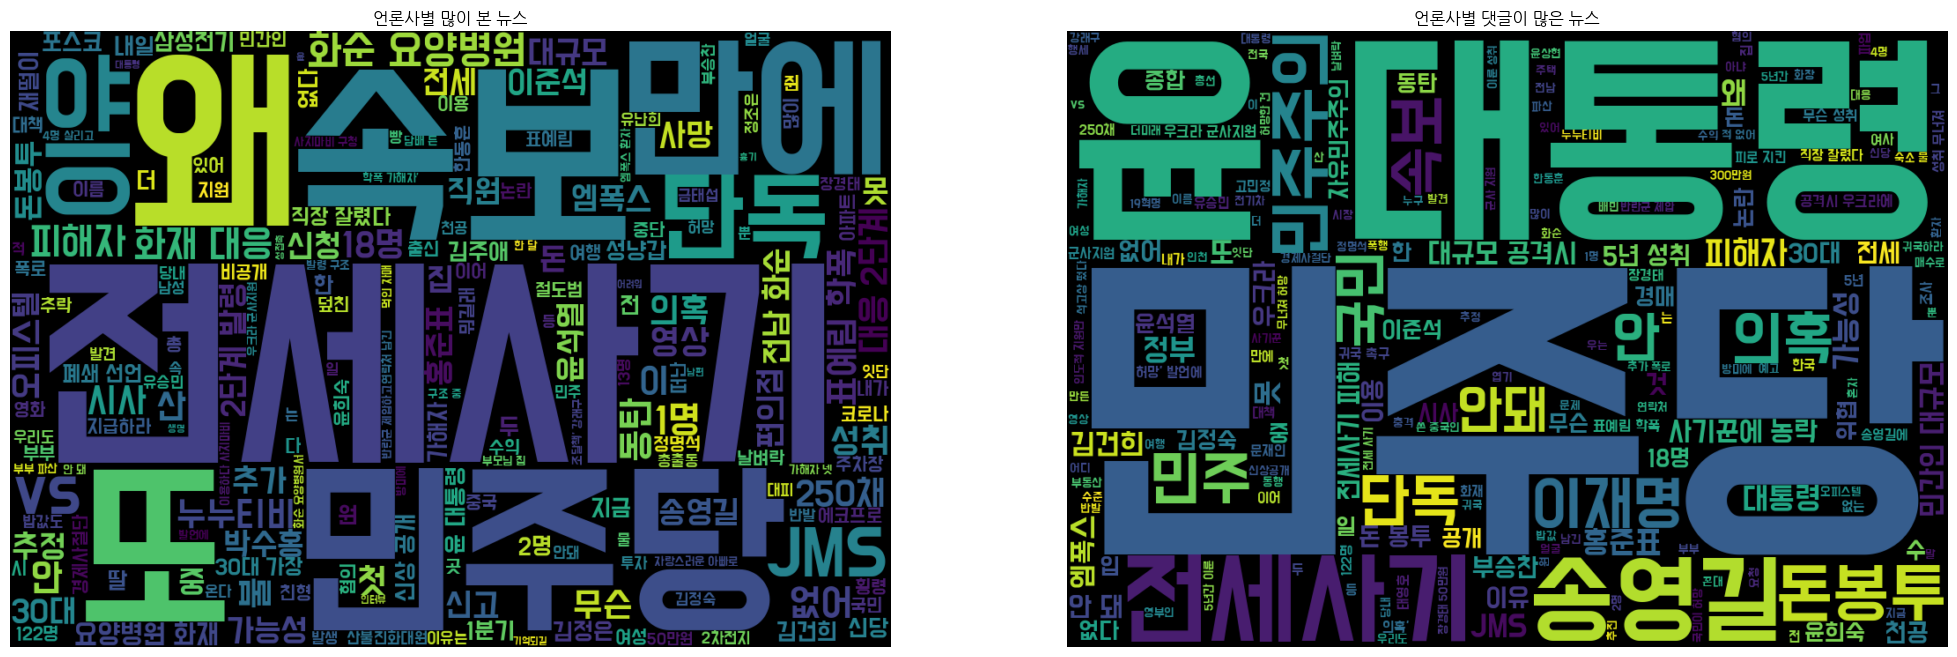

In [25]:
# 워드클라우드 그리기
fig = plt.figure(figsize=(25,15))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('언론사별 많이 본 뉴스')
ax1.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.set_title('언론사별 댓글이 많은 뉴스')
ax2.axis('off')


plt.show()